In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sn
import scipy.io as sio
import os
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import joblib
import tensorflow as tf

In [6]:
def normalize_raw_csi(raw_csi):
    return [v/128 for v in raw_csi]

def raw_csi_to_magnitudes(raw_csi):
    magnitudes = []
    if len(raw_csi) % 2 != 0:
        raw_csi = raw_csi[:-1]
    # Iterate through the raw CSI data by pairs
    for i in range(0, len(raw_csi), 2):
        # Extract the imaginary and real parts of the complex number
        imaginary = raw_csi[i]
        real = raw_csi[i + 1]
        # Calculate the magnitude of the complex number
        magnitude = math.sqrt(real**2 + imaginary**2)
        # Append the magnitude to the magnitudes array
        magnitudes.append(magnitude)
    return magnitudes

def normalize_magnitudes(magnitudes):
    return [v/(128*math.sqrt(2)) for v in magnitudes]

def raw_csi_to_phases(raw_csi):
    phases = []
    if len(raw_csi) % 2 != 0:
        raw_csi = raw_csi[:-1]
    # Iterate through the raw CSI data by pairs
    for i in range(0, len(raw_csi), 2):
        # Extract the imaginary and real parts of the complex number
        imaginary = raw_csi[i]
        real = raw_csi[i + 1]
        # Calculate the phase of the complex number
        phase = math.atan2(imaginary, real)
        # Append the phase to the phases array
        phases.append(phase)
    return phases

def raw_csi_to_features(csi_data_x,csi_data_y):
    rx,ry = csi_data_x,csi_data_y
    # rx=normalize_raw_csi(csi_data_x)
    # ry=normalize_raw_csi(csi_data_y)
    rx=raw_csi_to_magnitudes(rx)
    ry=raw_csi_to_magnitudes(ry)
    # rx=normalize_magnitudes(rx)
    # ry=normalize_magnitudes(ry)
    features=rx+ry
    return features


    

In [7]:
folder_dir="../CSI_Data_27122023_16cells_rearrrangement"
x_axis="Horizontal(X-axis)"
y_axis="Vertical(Y-axis)"
X=[]
Y=[]

In [8]:
for cell in range(0,16+1):
# for cell in range(0,1):
    
    
    cell_name=str(cell).zfill(2)
    df_x=pd.read_csv(f"{folder_dir}/{x_axis}/cell{cell_name}_16.csv")
    df_y=pd.read_csv(f"{folder_dir}/{y_axis}/cell{cell_name}_16.csv")
    cds_x=list(df_x["CSI_DATA"])[200:-200]
    cds_y=list(df_y["CSI_DATA"])[200:-200]
    for cdx,cdy in zip(cds_x,cds_y):
        x=[]
        y=[]
        
        csi_data_x=cdx[1:-1].strip().split(" ")
        csi_data_y=cdy[1:-1].strip().split(" ")
        

        csi_data_x=[int(v) for v in csi_data_x]
        csi_data_y=[int(v) for v in csi_data_y]

        for v in raw_csi_to_features(csi_data_x,csi_data_y):
            x.append(v)
        if cell==0:
            y.append(0)
            y=0
        else:
            y.append(cell)
            y=cell
        X.append(x)
        Y.append(y)
    

In [44]:
len(csi_data_x)

128

In [45]:
X=np.array(X)
Y=np.array(Y)
X.shape,Y.shape

((46519, 256), (46519,))

In [46]:
for features, answer in zip(X,Y):
    print(features,answer)
    continue

[110  96   6   0   0   0   0   0   0   0   0   0  22   0  23   0  24   2
  22   3  22   6  20   7  20   4  20   5  18   7  17   8  18  11  17   8
  16   9  16   9  15   8  14   9  14   6  11   6  11   6  14   6  13   6
  12   5  11   7  12   4  12   4  12   4   0   0  13   2  12   2  14   2
  11   0  14   0  11   0  13  -1  13   0  12  -2  13  -3  13  -3  12  -1
  14  -4  14  -4  13   0  15  -4  13  -5  11  -7  13  -5   9  -7   9  -8
  10  -5   9  -6   7  -8  10  -7   8  -9   0   0   0   0   0   0   0   0
   0   0 110  96   6   0   0   0   0   0   0   0   0   0  10 -10  11 -11
  10 -13  11 -13  11 -13  11 -13  12 -13  12 -13  13 -13  13 -13  15 -15
  15 -14  15 -13  15 -13  15 -12  15 -13  14 -11  14 -11  14 -10  13 -10
  13 -10  12  -9  13  -7  11  -9  11  -8   9  -8   0   0   8  -9   8  -8
   6  -8   6  -7   6  -6   4  -7   5  -6   3  -5   3  -7   2  -6   1  -4
   1  -4   0  -4  -2  -3  -2  -4  -3  -3  -1  -2  -3  -1  -3  -2  -4  -1
  -5  -5  -4  -2  -4  -2  -4   0  -7  -1  -6   2   

KeyboardInterrupt: 

KeyboardInterrupt: 

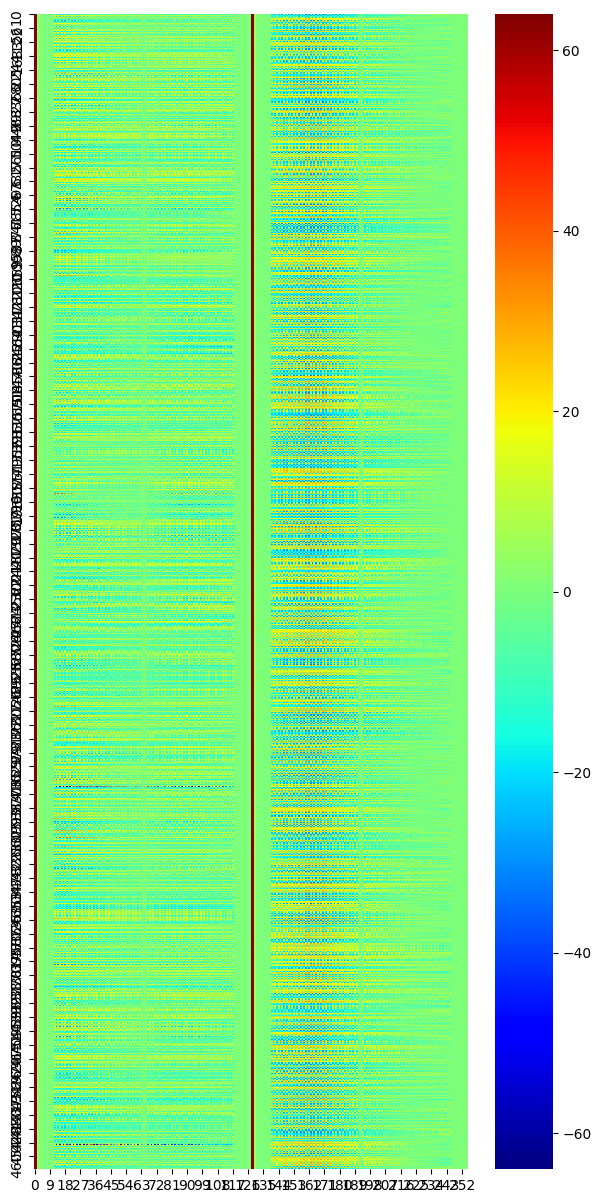

In [47]:
#plot heatmap?

plt.figure(figsize=(7,15))
# sn.heatmap(X, cmap="jet",vmin=0,vmax=40)
# sn.heatmap(X, cmap="jet",vmin=0,vmax=1)
sn.heatmap(X,cmap="jet",vmin=-64,vmax=64)
plt.show()
# df=pd.DataFrame(X)
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)


In [48]:
X.shape

(46519, 256)

KNN classifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=17)

In [50]:
print(knn.score(X_test,y_test))

0.3524290627687016


In [51]:
#save model
joblib.dump(knn, 'knn_model.pkl')
#recall
knn = joblib.load('knn_model.pkl')

In [52]:
for i in knn.predict(X):
    print (i)

0
2
5
11
16
5
16
16
0
16
16
16
0
0
16
2
2
5
5
5
0
5
5
16
0
5
0
0
3
3
9
0
0
15
0
0
0
16
0
0
2
0
0
0
1
0
3
15
0
5
0
0
12
9
5
0
16
0
0
11
0
5
5
0
0
0
5
12
5
0
16
16
16
5
16
0
0
0
0
0
11
0
0
0
13
0
5
0
2
0
0
0
0
5
13
5
15
5
5
5
16
1
2
13
3
16
0
3
11
16
16
0
16
5
0
0
0
16
0
9
9
0
5
0
16
16
0
12
5
2
2
0
9
0
0
3
13
2
13
0
2
12
0
0
5
0
0
0
2
0
15
16
14
9
15
5
16
2
2
3
5
0
0
16
13
2
15
16
0
0
3
9
5
16
0
0
5
0
9
0
15
0
0
5
0
0
5
0
5
0
0
0
5
2
5
5
9
2
5
16
5
0
16
13
5
5
16
0
5
5
0
3
0
0
5
3
0
5
0
15
5
16
5
5
0
5
0
5
0
15
0
0
0
13
0
5
5
5
11
5
0
0
0
0
0
13
0
2
2
11
5
11
11
0
11
15
0
16
15
0
0
5
12
0
5
12
16
0
0
0
0
5
0
0
11
0
16
0
0
0
16
5
15
0
5
11
0
0
0
0
0
0
16
0
12
0
0
0
2
0
0
0
15
0
16
16
0
0
0
5
7
16
0
0
16
16
5
0
15
0
11
0
5
13
0
0
0
0
0
0
3
3
15
0
2
0
0
0
0
2
12
15
15
15
16
9
15
5
0
16
13
15
5
0
3
5
1
5
0
0
0
0
0
3
16
0
13
11
0
0
0
11
0
0
15
0
0
0
0
16
0
0
5
0
0
15
0
5
0
0
5
16
15
0
0
0
0
0
9
16
15
16
0
5
0
9
3
15
0
5
0
16
12
5
5
9
16
0
2
16
0
0
0
15
16
12
16
0
0
16
0
15
5
5
0
0
0
16
2
0
0

sklearn MLPClassifier

In [12]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)
print("Creating")
mlp_classifier=MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000)
print("Training")
mlp_classifier.fit(X_train_scaled,y_train)
print("Saving")
joblib.dump(mlp_classifier, 'mlp_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
loaded_model = joblib.load('mlp_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

X_test_scaled=loaded_scaler.transform(X_test)

print("Estimating")
print(loaded_model.score(X_test_scaled,y_test))
#Take 3 minutes of training for raw csi features
#Take 1 minute 30 secs of training for magnitudes

Creating
Training
Saving
Estimating
0.8742476354256233


In [10]:
X_scaled=scaler.transform(X
mlp_classifier.predict(X)

array([ 5,  5,  5, ..., 15, 15, 15])

Tensorflow Neural Network

In [60]:
from sklearn.preprocessing import OneHotEncoder


nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(256,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
nn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder=OneHotEncoder()
y_train_encoded=encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_encoded=encoder.fit_transform(y_test.reshape(-1,1)).toarray()

print(X_train.shape)
print(y_train_encoded.shape)


# nn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))




(37215, 256)
(632655, 2)


In [61]:
nn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

ValueError: Data cardinality is ambiguous:
  x sizes: 37215
  y sizes: 632655
Make sure all arrays contain the same number of samples.

In [55]:
nn_model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\yanot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (5, 17) and (5, 3) are incompatible


In [25]:
knn = joblib.load('knn_model.pkl')
def predict_cell_index(csi_data_x,csi_data_y):
    global knn
    features=raw_csi_to_features(csi_data_x,csi_data_y)
    return knn.predict([features])[0]
def get_map_data(csi_data_x,csi_data_y):#It is best to average the answer over a few frames
    map_r=[
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0]
    ]
    cell_index=predict_cell_index(csi_data_x,csi_data_y)
    if cell_index==0:
        return map_r
    cell_index-=1
    map_r[cell_index//4][cell_index%4]=1
    return map_r

